# Examen Ciencia de datos para la economia Fernanda Contreras

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nba_logreg2.csv', sep = ";")
df.head(3)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0


A continuación se presenta una dataset sobre métricas de rendimientos de jugadores de la NBA durante su carrera, junto con la variable target si la carrera del basquetbolista supera o no los 5 años.

A continuación se detalla las variables que componen este dataset:

| Nombre columnas | Contenido |
|--- | --- |
|Name   |Nombre |
| GP    |Juegos jugados |
| MIN   |Minutos jugados |
| PTS   |Puntos por partido |
| FGM   |Objetivos de campo realizados |
| FGA   |Objetivos de campo intentados |
| FG%   |Porcentaje de puntos de campo |
| 3P Mode   |3 puntos hecho |
| 3PA   |Intentos de 3 puntos |
| 3P%   |3 puntos por ciento |
| FTM   |Tiro libre hecho |
| FTA   |Intentos de lanzamiento libre |
| FT%   |Porcentaje de lanzamiento libre |
| OREB  |Rebotes ofensivos |
| DREB  |Rebotes defensivos |
| REB   |Rebotes |
| AST   |Asistencias |
| STL   |Roba |
| BLK   |Bloques |
| TOV   |Pérdidas de balón |
| TARGET_5Yrs   |Variable predictora (1-Si la duración de la carrera>= 5 años) y (0-si<5) |

In [3]:
# Descripción de los datos, con media, desviacion estandar, minimo valor, maximo, etc.
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,60.402558,17.647931,6.820166,2.634763,5.902483,44.117532,0.249661,0.785628,19.308126,1.302784,1.827314,70.407148,1.007600,2.021445,3.028442,1.558992,0.620391,0.366140,1.196012,0.621520
std,17.481092,8.327441,4.365671,1.686850,3.598820,6.119492,0.384608,1.063856,16.022916,0.989341,1.326655,10.489838,0.779178,1.362464,2.062357,1.474159,0.410533,0.428534,0.724470,0.485191
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,43.900000,0.100000,0.300000,22.400000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.500000,1.700000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [4]:
variablescontinuas = ['MIN', 'PTS', 'FGM', 'FGA',  'FG%', '3P Made',  '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB','AST', 'STL', 'BLK','TOV']

dfcon = df[variablescontinuas]

dfcon.head()

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


Al igual que la solemne2, selecionamos las variables que son continuas para la realizacion del examen.


In [6]:
matrizcorr = dfcon.corr()
matrizcorr

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
MIN,1.000000,0.911746,0.902864,0.910194,0.208341,0.389474,0.402814,0.165997,0.791089,0.779813,0.236160,0.573655,0.747065,0.710853,0.629147,0.757050,0.401011,0.826431
PTS,0.911746,1.000000,0.990874,0.979676,0.261587,0.345289,0.355198,0.151072,0.896245,0.880826,0.254404,0.576421,0.696560,0.679002,0.551561,0.674937,0.390496,0.850272
FGM,0.902864,0.990874,1.000000,0.980117,0.297113,0.287956,0.297898,0.119493,0.848146,0.840667,0.219423,0.597468,0.705191,0.692678,0.532261,0.662457,0.400744,0.834343
FGA,0.910194,0.979676,0.980117,1.000000,0.135815,0.388860,0.412053,0.197160,0.826244,0.805507,0.264405,0.505547,0.642752,0.616497,0.589038,0.689771,0.325503,0.845952
FG%,0.208341,0.261587,0.297113,0.135815,1.000000,-0.291573,-0.347680,-0.330690,0.253381,0.306360,-0.150996,0.512346,0.411103,0.466126,-0.103546,0.061130,0.390786,0.126429
3P Made,0.389474,0.345289,0.287956,0.388860,-0.291573,1.000000,0.982579,0.589855,0.155717,0.093059,0.312256,-0.218210,0.018688,-0.070865,0.374314,0.305146,-0.155955,0.257015
3PA,0.402814,0.355198,0.297898,0.412053,-0.347680,0.982579,1.000000,0.582337,0.170463,0.105784,0.320901,-0.231050,0.013611,-0.079111,0.408066,0.336757,-0.169245,0.282496
3P%,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277
FTM,0.791089,0.896245,0.848146,0.826244,0.253381,0.155717,0.170463,0.030320,1.000000,0.980626,0.253125,0.586325,0.657652,0.657194,0.474403,0.599534,0.412565,0.804762
FTA,0.779813,0.880826,0.840667,0.805507,0.306360,0.093059,0.105784,-0.032333,0.980626,1.000000,0.110846,0.655408,0.704195,0.714267,0.427141,0.579737,0.473501,0.798856


Aqui vemos el grado de relacion de las variables.

# AHORA PARTE 2 PCA


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('nba_logreg2.csv', sep = ";")
df.head(3)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0


In [9]:
variablescontinuas = ['MIN', 'PTS', 'FGM', 'FGA',  'FG%', '3P Made',  '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB','AST', 'STL', 'BLK','TOV']

dfcon = df[variablescontinuas]

dfcon.head()

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


In [10]:
features = dfcon.columns 
x = dfcon.loc[:, features].values
x = StandardScaler().fit_transform(x)  # Normalizar los datos

Aqui se normalizan los datos para efectos de PCA

In [15]:
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

In [16]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')

Explained variance ratio: [0.50976427 0.21639089]


La varianza explicada es de 72.5 con los componentes, que son una combinancion lineal de las variables.

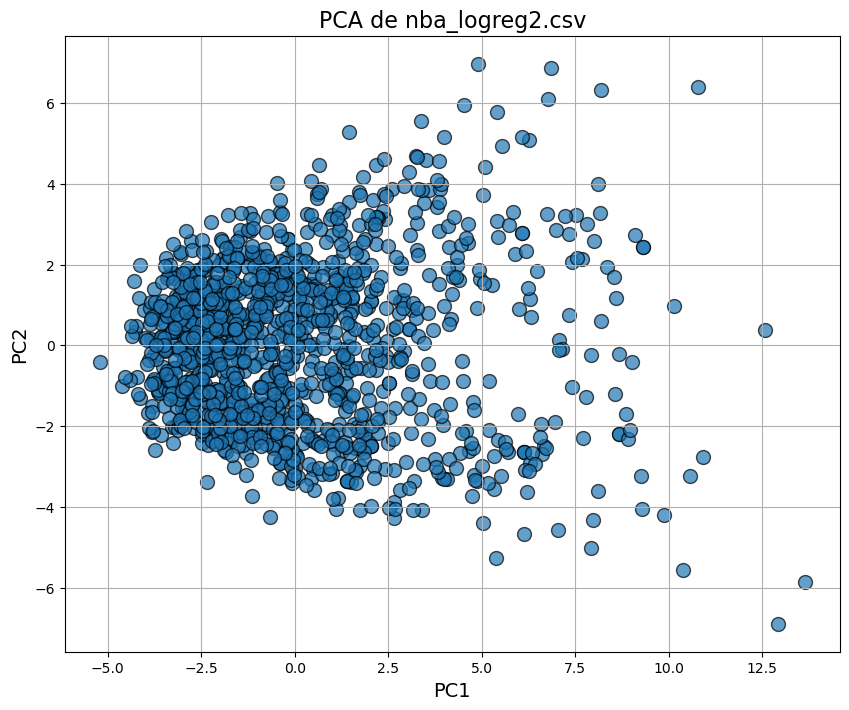

In [20]:
plt.figure(figsize=(10,8))  
scatter = plt.scatter(principalDf['PC1'], principalDf['PC2'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)  
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('PCA de nba_logreg2.csv', fontsize=16)
plt.grid(True) 

Bajo el supuesto de que No es necesario que realice los test estadístico, solamente explicarlos e indicar que se cumplen los supuestos.

# Supuestos del Análisis de Componentes Principales (PCA)
Asumiendo los supuestos de Linealidad, Maximización, Independencia de los componentes principales, Normalización de los datos.

1. **Linealidad**: En el contexto del PCA, la linealidad se refiere a la suposición de que las relaciones entre las variables originales son lineales. Esto significa que se espera que las combinaciones lineales de las variables puedan capturar la estructura de los datos. El PCA identifica las direcciones (componentes principales) que maximizan la varianza de los datos en un espacio lineal.

2. **Maximización de la varianza**: El objetivo del PCA es encontrar nuevas variables (componentes principales) que son combinaciones lineales de las variables originales y que explican la mayor cantidad posible de la varianza en los datos. Los primeros componentes principales capturan la mayor parte de la variabilidad presente en los datos, lo que permite una reducción de dimensionalidad efectiva mientras se conserva la mayor cantidad de información posible.

3. **Independencia de los componentes principales**: Los componentes principales son ortogonales entre sí, lo que significa que no están correlacionados. Esta independencia asegura que cada componente principal proporciona información única y no redundante sobre la variabilidad en los datos. La ortogonalidad se logra mediante la descomposición de los datos en direcciones que son mutuamente perpendiculares.

4. **Normalización de los datos**: La normalización implica escalar los datos de modo que cada característica tenga una media de 0 y una desviación estándar de 1. Este paso es crucial en el PCA porque asegura que todas las características contribuyan de manera equitativa al análisis, independientemente de sus unidades o magnitudes originales. Sin normalización, las variables con mayor varianza dominarían los componentes principales.

